In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

## 1 загрузка примера

In [3]:
df = pd.read_csv('ds_learning\\ds_second_phase\\Files\\monthly-boston-armed-robberies-j.csv', names=["Month","Count"], header=0)

In [4]:
df["date"] = pd.to_datetime(df["Month"].str.replace('"', ''), format='%Y-%m')

df.set_index("date", inplace=True)
df.drop("Month", axis=1, inplace=True)

In [5]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Count'])

In [6]:
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: 1.0011021402457787
p-value: 0.994277563805723


In [9]:
df['log_count'] = np.log(df['Count'])
df['diff_log_count'] = df['log_count'].diff()

result1 = adfuller(df['diff_log_count'].dropna())
print("ADF после преобразования:", result1[0])
print("p-value:", result1[1])

ADF после преобразования: -7.601792127269039
p-value: 2.3786024417438203e-11


In [11]:
df.head(2)

,Count,log_count,diff_log_count
date,,,
1966-01-01,41,3.713572,NaN
1966-02-01,39,3.663562,-0.05001


## 2 реализация МА для нестационарного и стационарного рядов

In [12]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

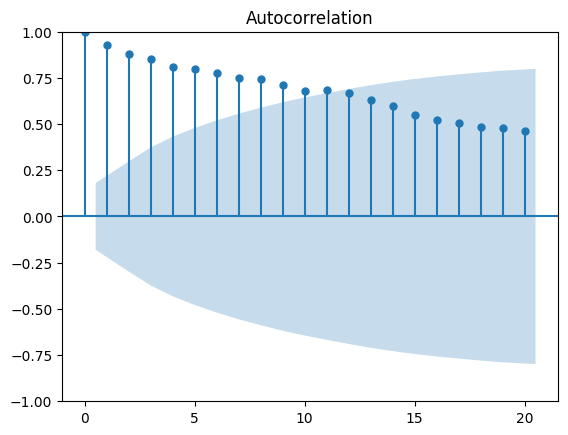

                               SARIMAX Results                                
Dep. Variable:                  Count   No. Observations:                  118
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -682.220
Date:                Mon, 04 Aug 2025   AIC                           1370.440
Time:                        15:35:40   BIC                           1378.752
Sample:                    01-01-1966   HQIC                          1373.815
                         - 10-01-1975                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        196.5688     15.067     13.046      0.000     167.038     226.099
ma.L1          0.8285      0.048     17.409      0.000       0.735       0.922
sigma2      6095.8314    921.027      6.619      0.0

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Local\Temp\ipykernel_29992\3273834281.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.ilo

In [ ]:
#нестационарный
plot_acf(df['Count'].dropna(), lags=20)
plt.show()

model_ma1 = ARIMA(df['Count'], order=(0,0,1))  
results_ma1 = model_ma1.fit()
print(results_ma1.summary())

forecast = results_ma1.forecast(steps=1)
print(f"Прогноз Count (MA1): {forecast[0]:.2f}")

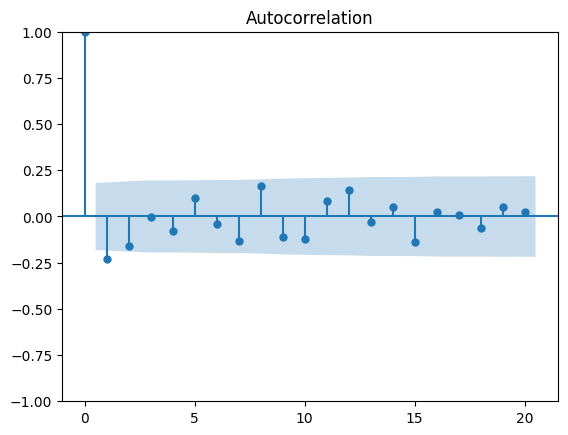

                               SARIMAX Results                                
Dep. Variable:         diff_log_count   No. Observations:                  117
Model:                 ARIMA(0, 0, 1)   Log Likelihood                  24.367
Date:                Mon, 04 Aug 2025   AIC                            -42.734
Time:                        15:37:11   BIC                            -34.447
Sample:                    02-01-1966   HQIC                           -39.369
                         - 10-01-1975                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0201      0.011      1.882      0.060      -0.001       0.041
ma.L1         -0.4148      0.086     -4.849      0.000      -0.583      -0.247
sigma2         0.0385      0.005      7.535      0.0

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Local\Temp\ipykernel_29992\2165030745.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.ilo

In [ ]:
#стационарный 
plot_acf(df['diff_log_count'].dropna(), lags=20)
plt.show()

model_ma1_stationary = ARIMA(df['diff_log_count'].dropna(), order=(0,0,1))
results_ma1_stationary = model_ma1_stationary.fit()
print(results_ma1_stationary.summary())

forecast_stationary = results_ma1_stationary.forecast(steps=1)
print(f"Прогноз diff_log_count (MA1): {forecast_stationary[0]:.4f}")

Думаю, стационарные ряды лучше так как имеют постоянные статистические свойства, прогнозы будут отклоняться из-за изменения уровня ряда, методы предполагают стационарность сами по себе